In [1]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (20,15)

## Homework 5
The purpose of this homework is to work carefully through a numeric/simulted solution to Bayes' Theorem. Bayes' Theorem reads
$$P(signal|data)=\frac{P(data|signal)P(signal)}{P(data)}$$

Effectively the goal of this homework (and the lab) is to find  P(signal|data) .

Reading through Bayes' theorem it says that given a data reading, the probability it was produced by a given true signal  (P(signal|data)) , is equal to the probability of getting a particular data reading given a certain true signal  (P(data|signal))  times the probability of the signal having a particular strength  (P(signal)) , divided by the probability of each data reading  (P(data)) .

This is just math, so is true. But in practice it is quite subtle how to use this.

### Problem 1
First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  $\sigma$ , say in the range 2-5. Create a million background events.

In [58]:
bg = stats.norm.rvs(loc=0, scale=3, size = 1000000)

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the  P(signal)  in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

In [59]:
signal = stats.uniform.rvs(loc = 0, scale = 20, size=1000000)

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  $P(data|signal)P(signal)$ .

In [60]:
data = bg + signal

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it. Here is the code I used for the plot in class:

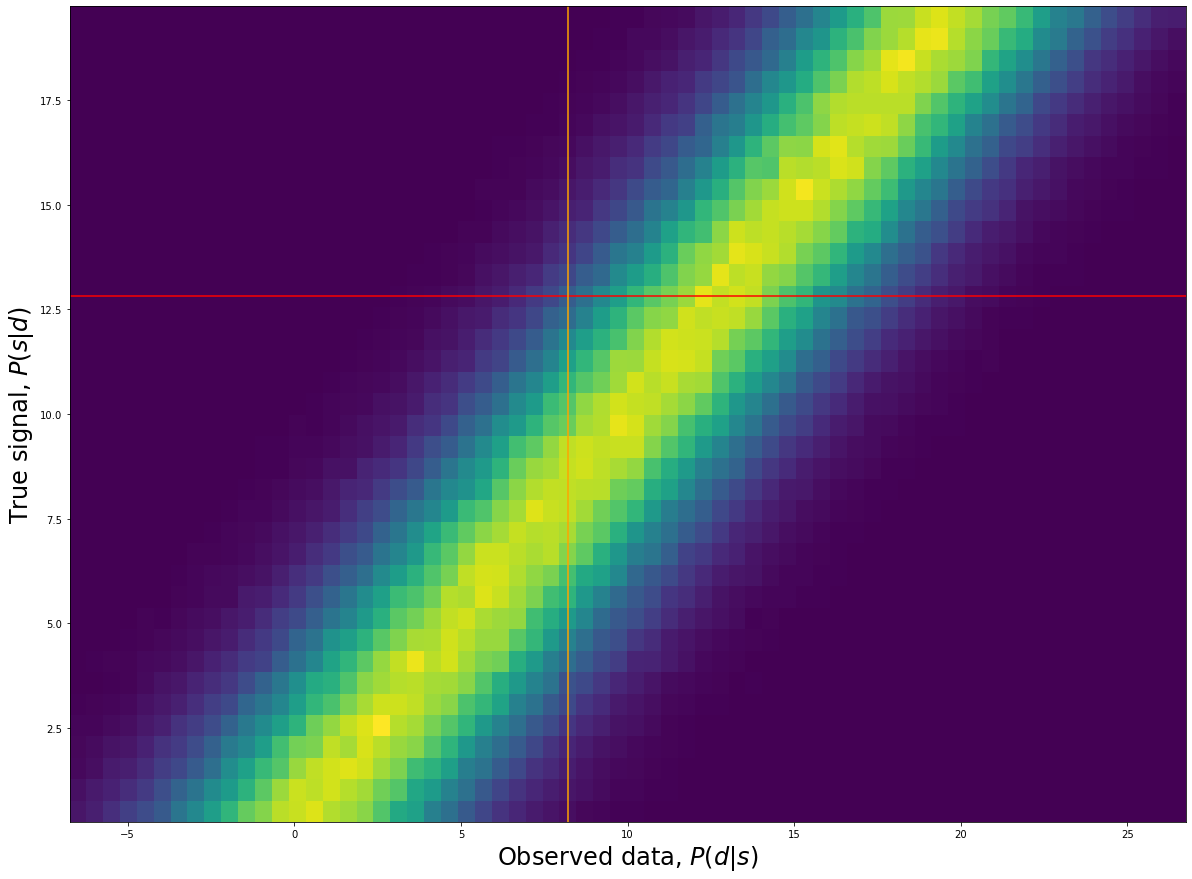

In [61]:
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
real = signaledges[25]
obs = dataedges[30]
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.axhline(real,color = 'red')
plt.axvline(obs,color = 'orange')
plt.show()

Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.

### Problem 1b

Select a true injected signal and plot  P(d|s) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

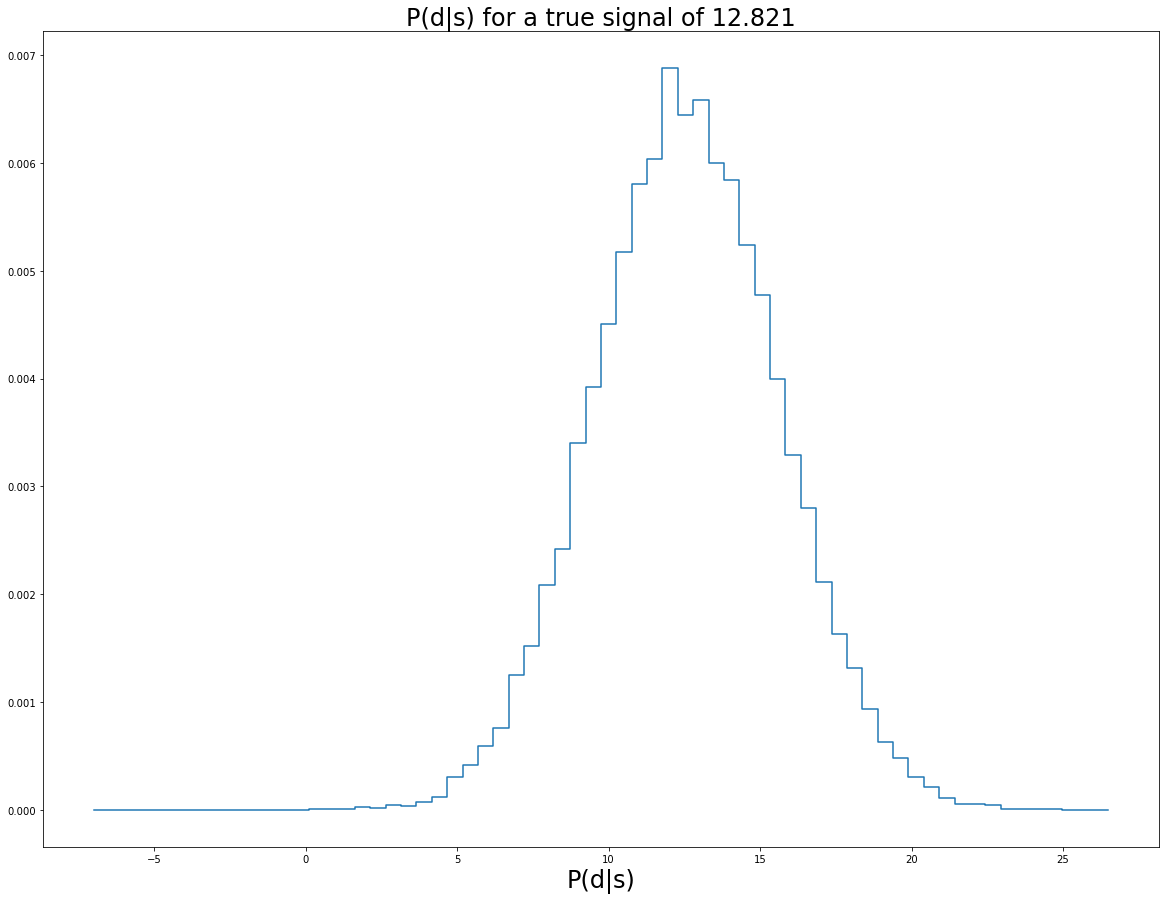

In [62]:
plt.step(temp[:-1], Psd[:,25])
plt.title('P(d|s) for a true signal of '+str(np.round(real,3)), fontsize=24)
plt.xlabel('P(d|s)', fontsize=24)
plt.show()

This plot shows the probability of any given box of data, assuming that the real signal we injected into our data was 12.821. In other words, the y-axis represents the probability that, assuming the signal behind our data is 12.821, we get an x-value between the start and end of a step if we select a value randomly from our data.

### Problem 1c
Select an observed data value and plot  $P(s|d)$ . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

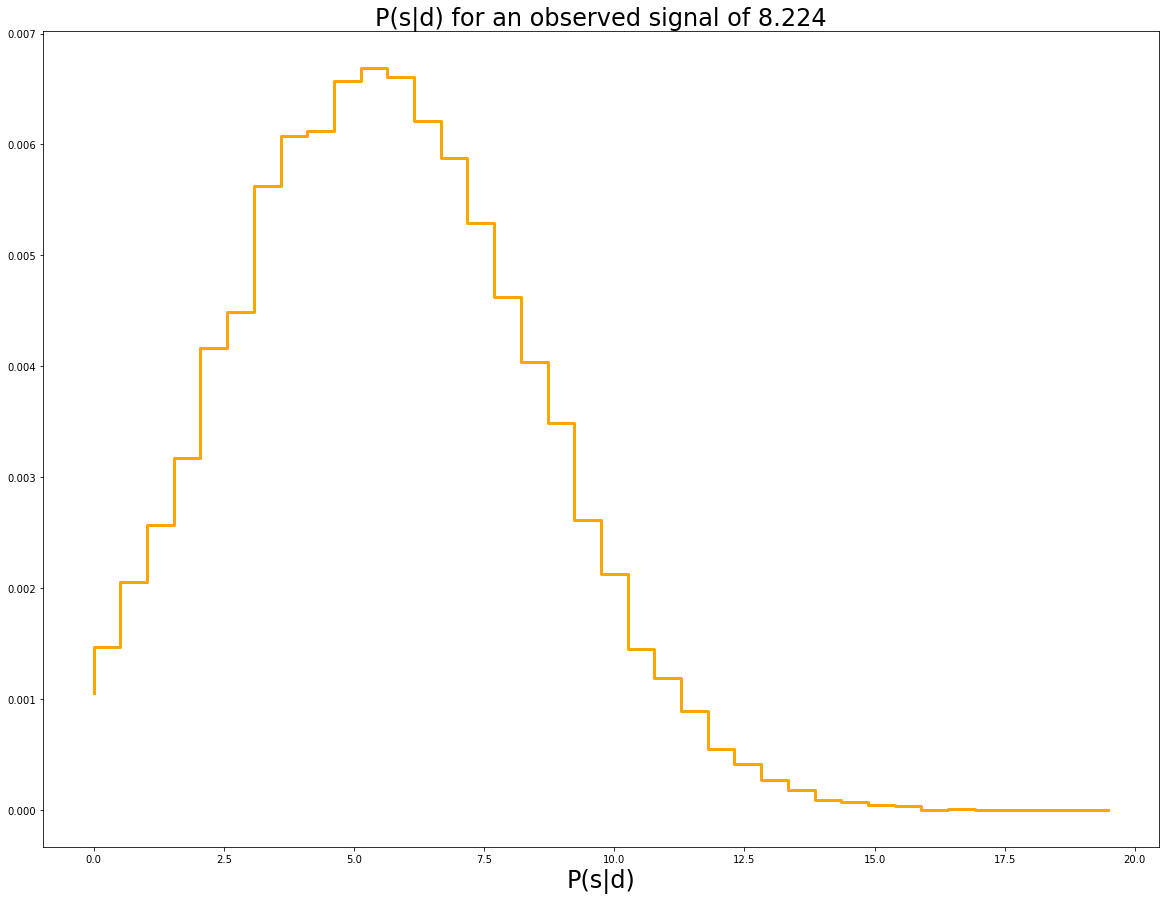

In [63]:
plt.step(temp2[:-1],Psd[25,:],Linewidth = 3, color = 'orange')
plt.title('P(s|d) for an observed signal of ' + str(np.round(obs,3)) ,fontsize = 24)
plt.xlabel('P(s|d)',fontsize = 24)
plt.show()

The "observed signal" is the value we observe from the combination of our signal and background. However, as the background has a non-zero value, the real signal is not equal to the observed signal. Therefore, this plot shows us the probability of each real signal value, assuming that our observed signal is 8.224.

### Problem 2

Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  $\sigma$ ]. Reproduce the graphs above. Lastly overplot the  $P(d|s)$  and  $P(s|d)$  plots. Why are they not centered on the same value? Explain carefully.

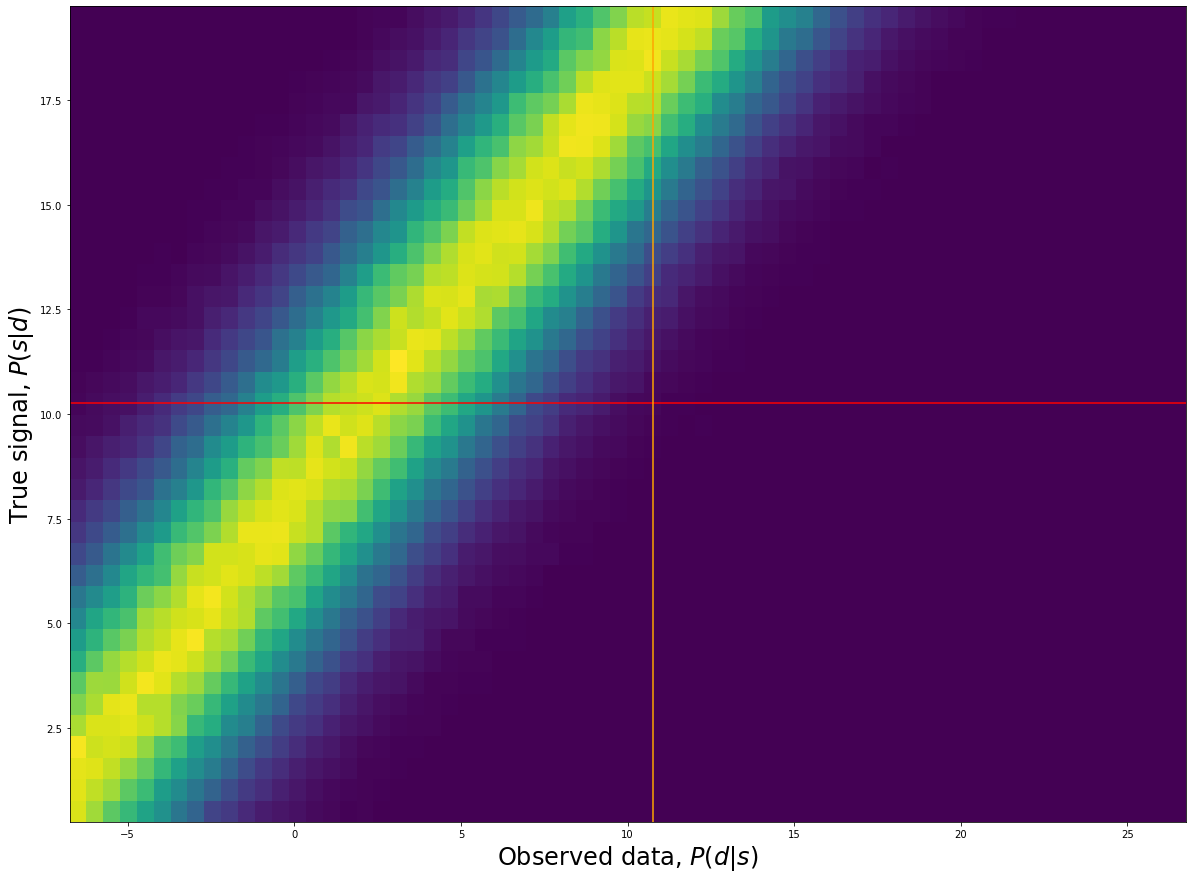

In [66]:
bg = stats.norm.rvs(loc=-8,scale=3, size = 1000000)
signal = stats.uniform.rvs(loc = 0, scale = 20, size=1000000)
data = bg + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
real = signaledges[20]
obs = dataedges[35]
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.axhline(real,color = 'red')
plt.axvline(obs,color = 'orange')
plt.show()

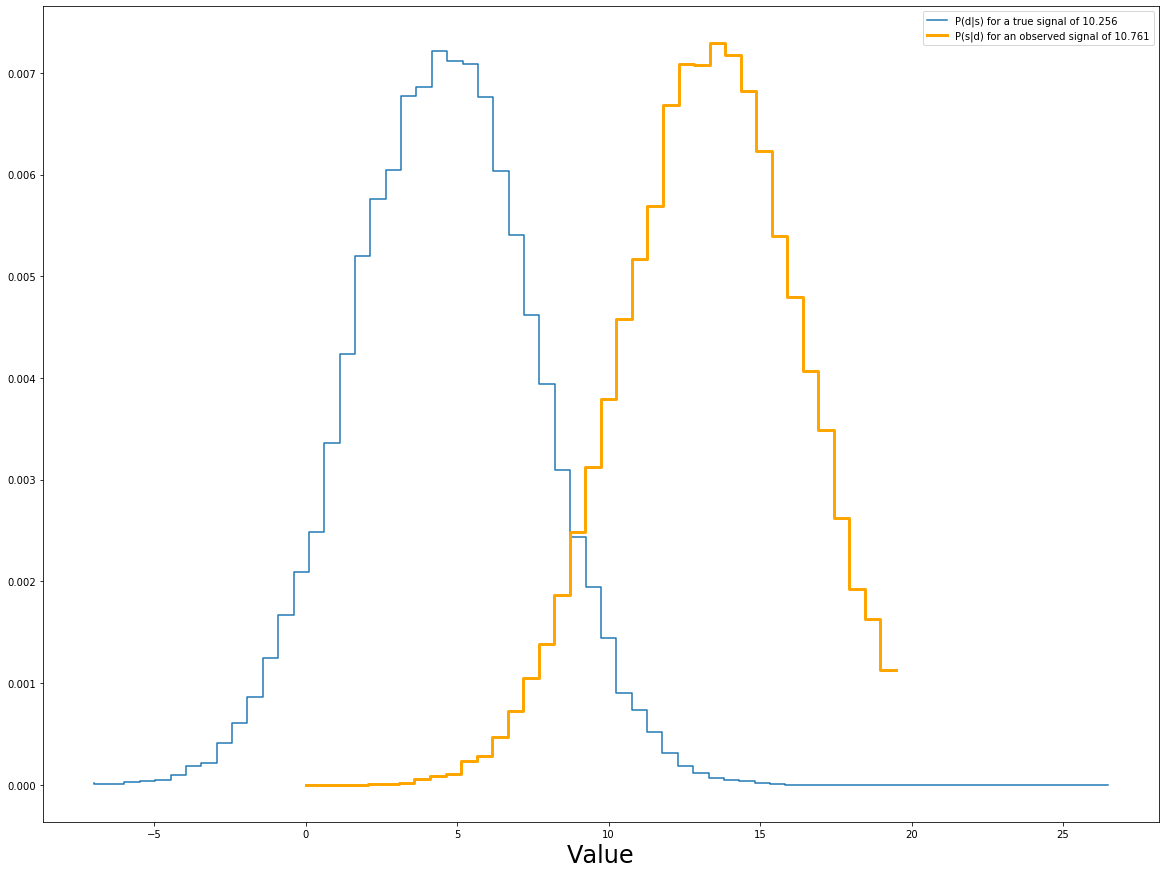

In [78]:
pds = plt.step(temp[:-1], Psd[:,25], label='P(d|s) for a true signal of '+str(np.round(real,3)))
psd = plt.step(temp2[:-1],Psd[25,:],Linewidth = 3, color = 'orange', label='P(s|d) for an observed signal of ' + str(np.round(obs,3)))
plt.xlabel('Value',fontsize = 24)
plt.legend()
plt.show()

As we can see from the graph above, the plots for $P(d|s)$ and $P(s|d)$ are not centered at the same value. This is because they measure two completely different things. $P(d|s)$ measures the likelihood of getting a random value from our distribution assuming that a signal exists and is equal to s. By contrast, $P(s|d)$ measures the likelihood of the real value of the signal assuming our data leads us to believe that a signal exists which is equal to d. There is actually very little reason to think they should be centered at the same value.